# 02_RQ1_failure_patterns

## Load Tables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

c:\Users\fitr\Syncthing\School\MDS\Block3\DATA542\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


## Select rejected AI PRs

In [4]:
# identify ai-generated PRs
agent_prs = pr_df[pr_df["agent"].notnull()].copy()

In [5]:
# identify rejection vs merge outcome
agent_prs["is_rejected"] = agent_prs["merged_at"].isna()

agent_prs.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,is_rejected
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911,True
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2,False
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30,False
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...,False
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625,True


In [6]:
rejected_prs = agent_prs[agent_prs["is_rejected"] == True]

## Categorize reviewer comments

In [7]:
pr_review_comments_df = pr_review_comments_df.merge(
    pr_reviews_df[["id", "pr_id"]],
    left_on="pull_request_review_id",
    right_on="id",
    how="left",
    suffixes=("", "_review")
)

In [8]:
def classify_comment(text):
    # Handle None, NaN, or empty strings
    if not isinstance(text, str) or text.strip() == "":
        return "other"

    t = text.lower()

    if any(k in t for k in ["incorrect", "wrong", "bug", "logic", "fails"]):
        return "correctness"
    if any(k in t for k in ["test", "coverage", "unit test"]):
        return "tests"
    if any(k in t for k in ["format", "style", "lint", "naming"]):
        return "style"
    if any(k in t for k in ["security", "vulnerability", "unsafe"]):
        return "security"

    return "other"

pr_review_comments_df["category"] = pr_review_comments_df["body"].apply(classify_comment)

In [9]:
comment_stats = (
    pr_review_comments_df.groupby(["pr_id", "category"])
    .size()
    .unstack(fill_value=0)
)

## Compute patch characteristics

In [10]:
# handlemissing values

pr_commit_details_df["filename"] = pr_commit_details_df["filename"].fillna("UNKNOWN")

In [11]:
import numpy as np

def classify_file(filename):
    f = filename.lower()

    if f == "unknown":
        return "unknown"   # treat separately so it doesn't become "source"

    if "test" in f or f.endswith("_test.py"):
        return "test"
    if f.endswith(".md") or "doc" in f:
        return "doc"
    return "source"

pr_commit_details_df["file_type"] = pr_commit_details_df["filename"].apply(classify_file)

In [12]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch,file_type
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n...",source
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im...",doc
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None,source
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i...",doc
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt...",doc


In [13]:
# extract patch related features
patch_stats = pr_commit_details_df.groupby("pr_id").agg(
    files_changed=("filename", "count"),
    additions=("additions", "sum"),
    deletions=("deletions", "sum"),
    changes=("changes", "sum"),
)

In [14]:
# compute proportions

file_type_counts = (
    pr_commit_details_df
    .groupby(["pr_id", "file_type"])
    .size()
    .unstack(fill_value=0)
)

for col in ["test", "doc", "source", "unknown"]:
    if col not in file_type_counts.columns:
        file_type_counts[col] = 0

file_type_counts["total"] = (
    file_type_counts["test"] +
    file_type_counts["doc"] +
    file_type_counts["source"] +
    file_type_counts["unknown"]
)

file_type_counts["prop_test"]   = file_type_counts["test"]   / file_type_counts["total"]
file_type_counts["prop_doc"]    = file_type_counts["doc"]    / file_type_counts["total"]
file_type_counts["prop_source"] = file_type_counts["source"] / file_type_counts["total"]
file_type_counts["prop_unknown"]= file_type_counts["unknown"]/ file_type_counts["total"]

## Merge everything into one PR-level dataset

In [15]:
df = (
    rejected_prs[["id"]]
    .merge(
        patch_stats, 
        left_on="id", 
        right_index=True, 
        how="left"
        )
    .merge(
        file_type_counts[["prop_test", "prop_doc", "prop_source"]],
        left_on="id", 
        right_index=True, 
        how="left"
        )
    .merge(
        comment_stats, 
        left_on="id", 
        right_index=True, 
        how="left"
        )
    .fillna(0)
)

df.head()

,id,files_changed,additions,deletions,changes,prop_test,prop_doc,prop_source,correctness,other,security,style,tests
0,3264933329,3.0,394.0,2.0,396.0,0.333333,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0
4,3265782173,21.0,53.0,168.0,221.0,0.142857,0.000000,0.857143,0.0,0.0,0.0,0.0,0.0
5,3231949586,25.0,2702.0,545.0,3247.0,0.080000,0.000000,0.920000,1.0,0.0,0.0,0.0,0.0
6,3231950376,168.0,12061.0,1827.0,13888.0,0.077381,0.017857,0.904762,0.0,0.0,0.0,0.0,0.0
7,3231951012,183.0,20084.0,3822.0,23906.0,0.071038,0.016393,0.912568,0.0,0.0,0.0,0.0,0.0


## Frequency analysis

correctness    1094.0
tests          1393.0
style           612.0
security        250.0
other          6178.0
dtype: float64


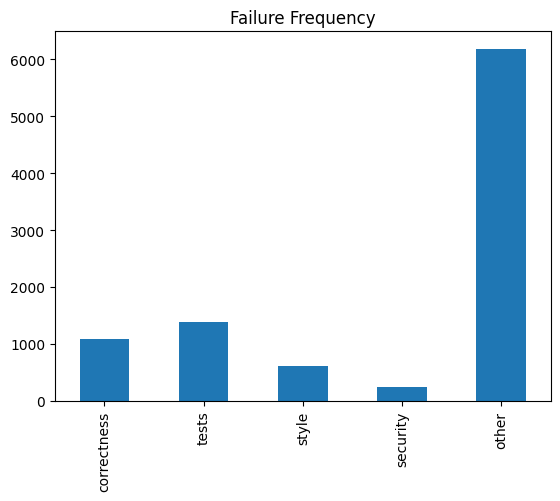

In [16]:
failure_freq = df[["correctness", "tests", "style", "security", "other"]].sum()
print(failure_freq)

# plot
failure_freq.plot(kind="bar", title="Failure Frequency")
plt.show()

In [17]:
df[["files_changed", "additions", "deletions", "prop_test", "prop_source"]].describe()

,files_changed,additions,deletions,prop_test,prop_source
count,9582.000000,9.582000e+03,9582.000000,9582.000000,9582.000000
mean,28.347735,2.054488e+03,1087.533187,0.217433,0.568911
std,92.295455,1.848266e+04,13319.834946,0.307428,0.374147
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,2.800000e+01,2.000000,0.000000,0.222222
50%,6.000000,1.230000e+02,16.000000,0.000000,0.625000
75%,15.000000,4.650000e+02,114.000000,0.375801,0.968631
max,2682.000000,1.053409e+06,981515.000000,1.000000,1.000000


## Pattern mining

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[["files_changed", "additions", "deletions", 
        "prop_test", "prop_doc", "prop_source",
        "correctness", "tests", "style", "security"]]

X_scaled = StandardScaler().fit_transform(X)

clusters = KMeans(n_clusters=3, random_state=0).fit_predict(X_scaled)
df["cluster"] = clusters

df.groupby("cluster").mean()

,id,files_changed,additions,deletions,changes,prop_test,prop_doc,prop_source,correctness,other,security,style,tests
cluster,,,,,,,,,,,,,
0,3.142040e+09,23.100414,2193.047619,544.447205,2737.494824,0.025859,0.803076,0.125442,0.079710,0.671843,0.019669,0.109731,0.049689
1,3.150401e+09,22.975791,1041.487896,605.604593,1647.092489,0.546845,0.043432,0.221886,0.090627,0.605525,0.013966,0.028243,0.284916
2,3.119627e+09,32.496292,2634.770115,1472.663886,4107.434001,0.054974,0.044027,0.855619,0.134409,0.663330,0.034483,0.076937,0.079162


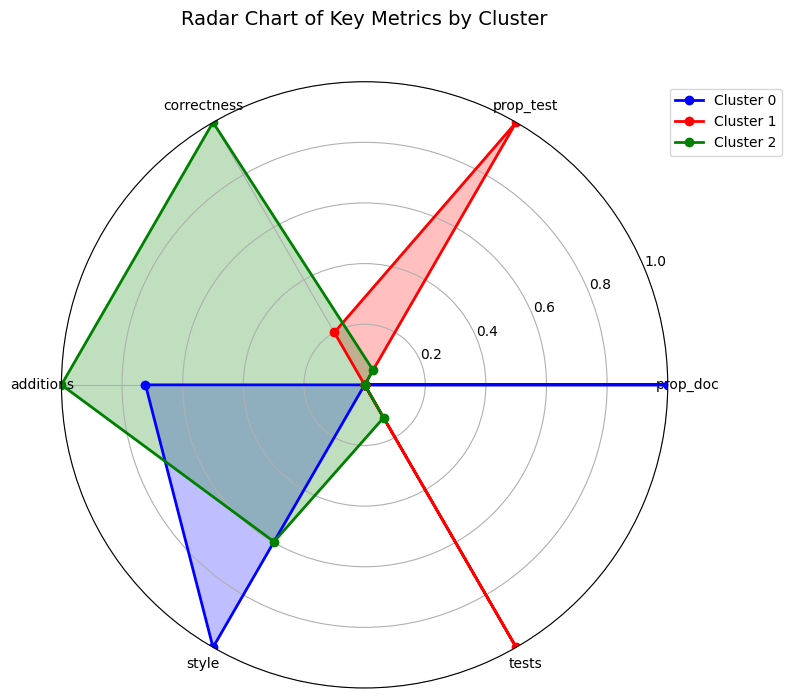

In [19]:
# Labels for the metrics
labels = ['prop_doc', 'prop_test', 'correctness', 'additions', 'style', 'tests']

# Compute means by cluster
cluster_means = df.groupby('cluster')[labels].mean()

# Convert to numpy array for radar chart
data = cluster_means.values

# Normalize data 
data_normalized = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0) + 1e-8)

# Number of variables
N = len(labels)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
colors = ['blue', 'red', 'green']

for i in range(data_normalized.shape[0]):
    values = data_normalized[i].tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_ylim(0, 1)
ax.set_title('Radar Chart of Key Metrics by Cluster', size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()